# Explore the dataset, review descriptive statistics, and identify outliers in water–cement ratio

In [10]:
# Explore the dataset
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = 'concrete_mix_classification.csv'
df = pd.read_csv(path)
df.head(), df.shape


(   id  cement_content_kg_m3  water_cement_ratio  aggregate_size_mm  \
 0   1                 314.9               0.484               25.9   
 1   2                 439.8               0.385               21.7   
 2   3                 397.0               0.641               24.6   
 3   4                 289.6               0.518               22.7   
 4   5                 345.3               0.455               23.9   
 
    fine_agg_pct  curing_time_days  curing_temp_C  slump_mm  air_content_pct  \
 0          33.3                56           15.1        83              3.1   
 1          37.6                28           17.7       103              3.6   
 2          35.3                21           11.9        99              5.6   
 3          42.0                21           21.4        58              5.8   
 4          50.5                21           23.1        87              5.1   
 
   admixture_type cement_type mixing_method  high_strength_class  \
 0    plasticizer     

In [25]:
# Review descriptive statistics
cols = ['cement_content_kg_m3', 'water_cement_ratio', 'aggregate_size_mm',
        'fine_agg_pct', 'curing_time_days', 'curing_temp_C', 'slump_mm',
        'air_content_pct','high_strength_class', 'is_outlier_wcr']
print(df.describe())

              id  cement_content_kg_m3  water_cement_ratio  aggregate_size_mm  \
count  700.00000            700.000000          700.000000         700.000000   
mean   350.50000            379.816857            0.485769          20.150714   
std    202.21688             58.656646            0.145165           5.814590   
min      1.00000            250.000000            0.063000           5.000000   
25%    175.75000            339.450000            0.411000          16.200000   
50%    350.50000            379.750000            0.476000          20.300000   
75%    525.25000            420.900000            0.542250          24.325000   
max    700.00000            520.000000            1.474000          37.100000   

       fine_agg_pct  curing_time_days  curing_temp_C    slump_mm  \
count    700.000000         700.00000     700.000000  700.000000   
mean      38.206714          28.11000      22.273143   80.947143   
std        7.832946          14.46502       4.936874   25.183136  

water_cement_ratio: 23 outliers (IQR fences 0.21..0.74)


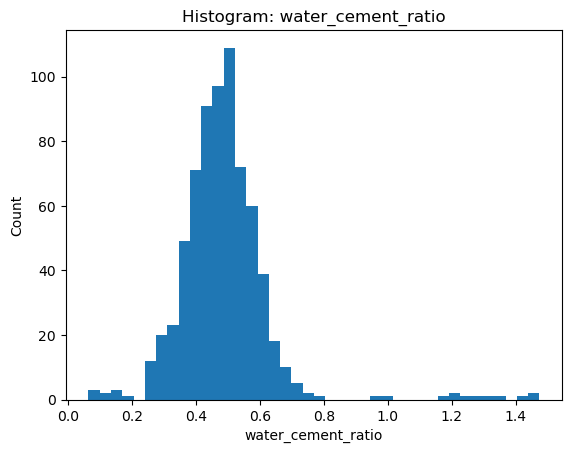

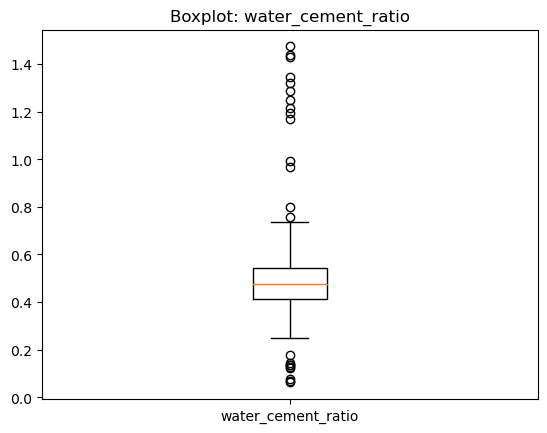

In [12]:
# Identify outliers in water–cement ratio
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (s < lower) | (s > upper), (lower, upper)

mask, (lo, hi) = iqr_mask(df['water_cement_ratio'])
print(f'water_cement_ratio: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')


plt.figure()
plt.hist(df['water_cement_ratio'].dropna(), bins=40)
plt.title(f'Histogram: water_cement_ratio')
plt.xlabel('water_cement_ratio'); plt.ylabel('Count')
plt.show()

plt.figure()
plt.boxplot(df['water_cement_ratio'].dropna(), vert=True, labels=['water_cement_ratio'])
plt.title(f'Boxplot: water_cement_ratio')
plt.show()

# Prepare the data by separating features and target, scaling numerical values, and encoding categorical variables.

In [ ]:
# Seperating Features and Target